<a href="https://colab.research.google.com/github/puneat/ML_project_UCS611/blob/data-visualization/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd /gdrive/My Drive/ml

/gdrive/My Drive/ml


In [0]:
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 798kB 8.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=abf0d932f55a260ea4c1f5bd0c069fb64895cbeb2263ee2e622af7633b8fecfa
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


In [0]:
import numpy as np
import csv
from numpy import array
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import statistics
from scipy.integrate import odeint
%matplotlib inline 
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
import io
from sklearn.preprocessing import LabelEncoder
from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span

output_notebook(resources=INLINE)
le=LabelEncoder()


In [0]:
with open('case_time_series.csv', 'r') as f:
    cases = list(csv.reader(f, delimiter=','))
cases=array(cases)
num_days = np.linspace(1,cases.shape[0]-1 , cases.shape[0]-1)
total_cases=cases[1:,[2,4,6]];
total_cases.astype(int);

daily_cases=cases[1:,[1,3,5]];
daily_cases.astype(int);

day5_moving_averages=cases[1:,[1,8,9]];
day5_moving_averages.astype(float);

day10_moving_averages=cases[1:,[1,10,11]];
day10_moving_averages.astype(float);

macd_moving_averages=cases[1:,[1,12]];
macd_moving_averages.astype(float);



UFuncTypeError: ignored

In [0]:
def plot_data(num_days,total_cases, label,plot_title):
  fig = plt.figure(facecolor='w',figsize=(17,8))
  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

  num_days_new = np.linspace(t.min(), t.max(), 300) 

  for i in range(0,total_cases.shape[1]):

    spl = make_interp_spline(num_days,total_cases[:,i], k=3)  # type: BSpline
    power_smooth = spl(num_days_new)

    ax.plot(num_days_new, power_smooth, linewidth=2, label=label[i])
  

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Patients')
  ax.set_title(plot_title)
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

  plt.show()

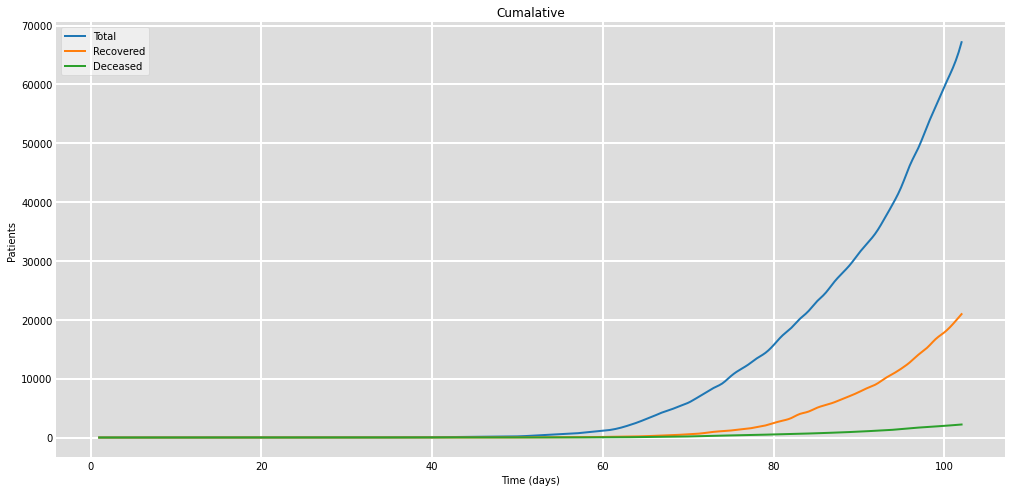

In [0]:
plot_data(num_days,total_cases,['Total','Recovered','Deceased'],'Cumalative')

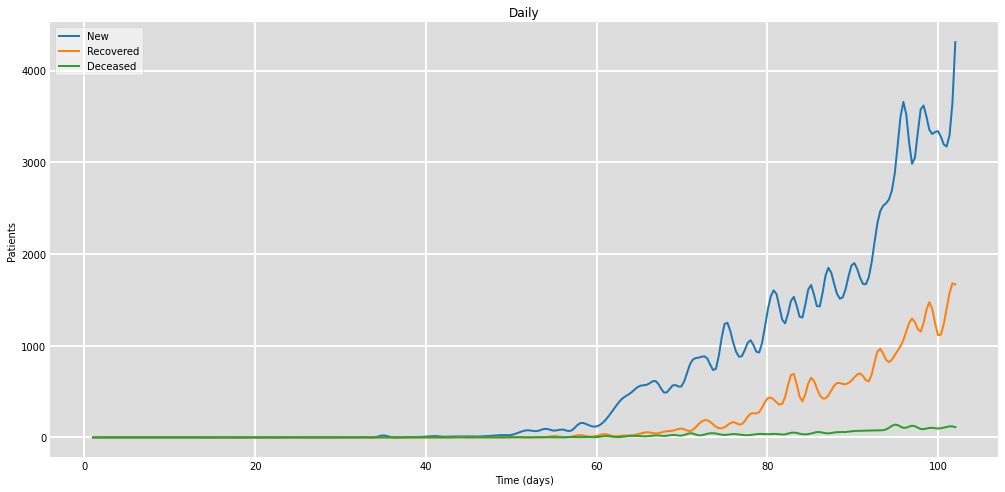

In [0]:
plot_data(num_days,daily_cases,['New','Recovered','Deceased'],'Daily')

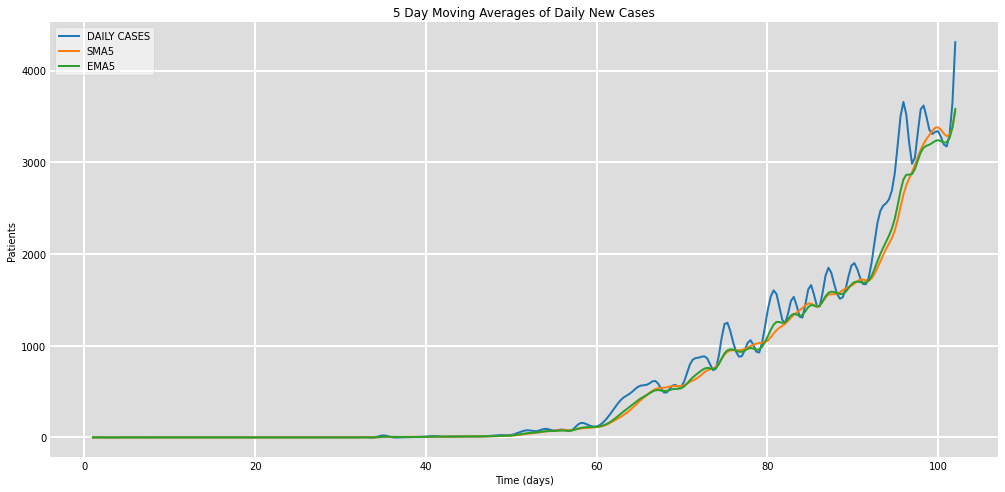

In [0]:
plot_data(num_days,day5_moving_averages,['DAILY CASES','SMA5','EMA5'],'5 Day Moving Averages of Daily New Cases')

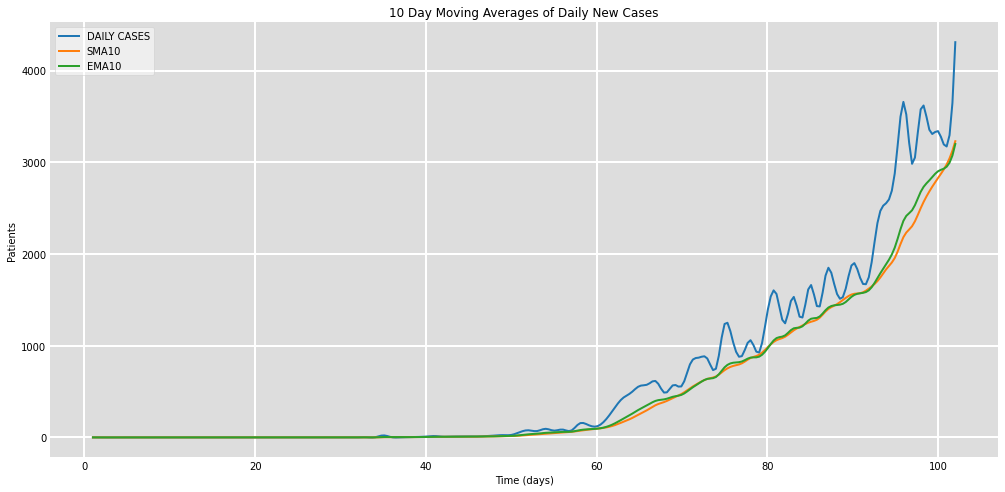

In [0]:
plot_data(num_days,day10_moving_averages,['DAILY CASES','SMA10','EMA10'],'10 Day Moving Averages of Daily New Cases')

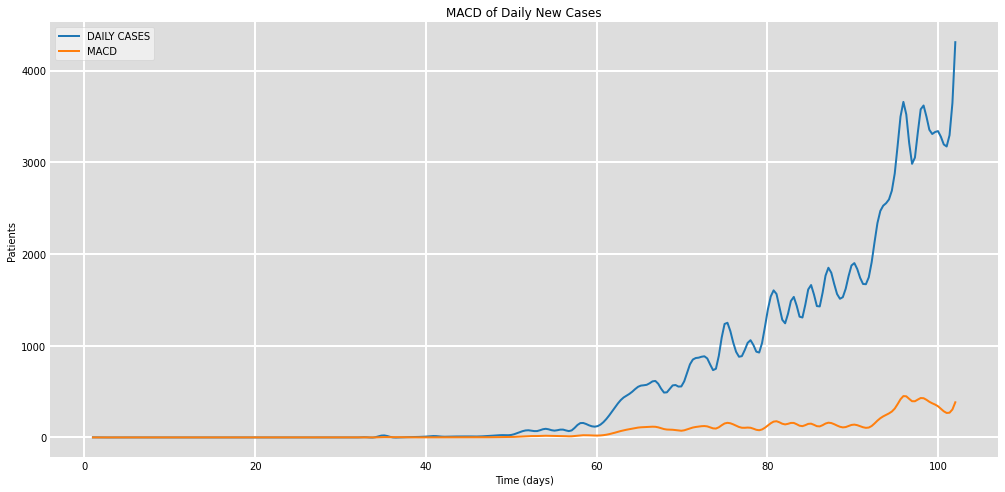

In [0]:
plot_data(num_days,macd_moving_averages,['DAILY CASES','MACD'],'MACD of Daily New Cases')

In [0]:
ages = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/AgeGroupDetails.csv')
india_data = pd.read_csv('/gdrive/My Drive/ml/STATE_DATA/combined_states.csv')
icu_beds = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/IndividualDetails.csv')
ICMR_details = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/gdrive/My Drive/ml/covid19-in-india/StatewiseTestingDetails.csv')

In [55]:
statewise_cases = pd.DataFrame(india_data.groupby(['STATE'])['CONFIRMED', 'DEATH', 'CURED'].max().reset_index())
print(statewise_cases)

                         STATE  CONFIRMED  DEATH   CURED
0   Andhra PradeshANDTelengana     3377.0   78.0  1878.0
1                        Bihar      830.0    6.0   382.0
2                        Delhi     7639.0   86.0  2512.0
3                       Gujrat     8904.0  537.0  3246.0
4              Jammu & Kashmir      934.0   10.0   455.0
5                    Karnataka      925.0   31.0   433.0
6               Madhya Pradesh     3986.0  226.0  1860.0
7                  Maharashtra    24427.0  920.0  5125.0
8          Punjab + Chandigarh     2101.0   35.0   199.0
9                    Rajasthan     4126.0  117.0  2454.0
10                  Tamil Nadu     8718.0   61.0  2134.0
11               Uttar Pradesh     3664.0   82.0  1873.0
12                 West Bengal     2173.0  198.0   612.0


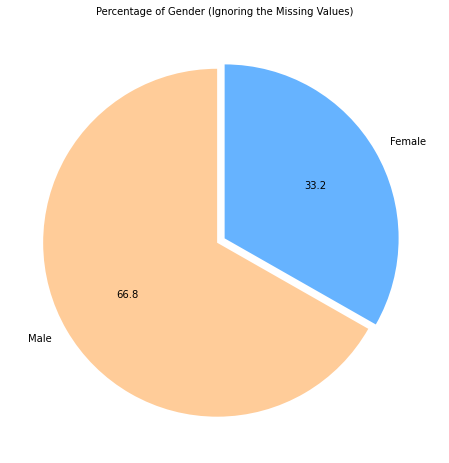

In [56]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode = (0.05, 0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize= (8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

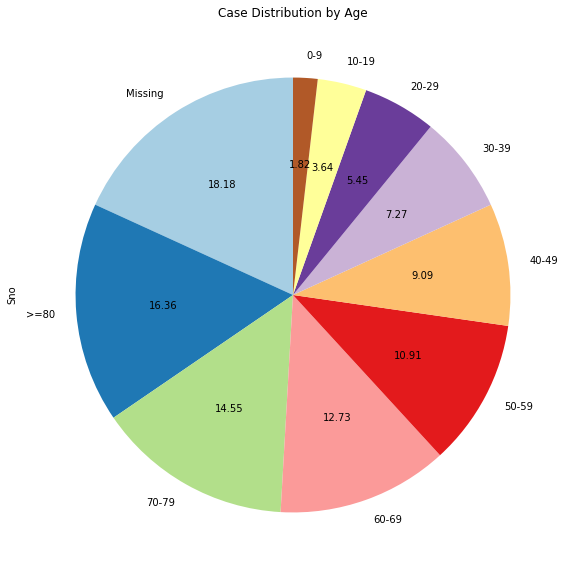

In [51]:
fig = plt.figure(figsize=(10,10))
age_dist_india = age_group.groupby('AgeGroup')['Sno'].sum().sort_values(ascending=False)
def absolute_value(val):
    a  = val
    return (np.round(a,2))
age_dist_india.plot(kind="pie",title='Case Distribution by Age',autopct=absolute_value,colormap='Paired',startangle=90)

plt.show ()

In [59]:
state_details = pd.pivot_table(india_data, values=['CONFIRMED', 'DEATH', 'CURED'], index='STATE', aggfunc='max')
state_details['Recovery Rate'] = round(state_details['CURED'] / state_details['CONFIRMED'],5)
state_details['Death Rate'] = round(state_details['DEATH'] /state_details['CONFIRMED'], 5)
state_details = state_details.sort_values(by='CONFIRMED', ascending= False)
state_details.style.background_gradient(cmap='Blues')

,CONFIRMED,CURED,DEATH,Recovery Rate,Death Rate
STATE,,,,,
Maharashtra,24427.000000,5125.000000,920.000000,0.209810,0.037660
Gujrat,8904.000000,3246.000000,537.000000,0.364560,0.060310
Tamil Nadu,8718.000000,2134.000000,61.000000,0.244780,0.007000
Delhi,7639.000000,2512.000000,86.000000,0.328840,0.011260
Rajasthan,4126.000000,2454.000000,117.000000,0.594760,0.028360
Madhya Pradesh,3986.000000,1860.000000,226.000000,0.466630,0.056700
Uttar Pradesh,3664.000000,1873.000000,82.000000,0.511190,0.022380
Andhra PradeshANDTelengana,3377.000000,1878.000000,78.000000,0.556110,0.023100
West Bengal,2173.000000,612.000000,198.000000,0.281640,0.091120


In [65]:
print('Total Confirmed Cases: ',sum((state_details['CONFIRMED'])))
print('Total Recovered Cases: ',sum((state_details['CURED'])))
print('Total Deaths: ',sum((state_details['DEATH'])))

Total Confirmed Cases:  71804.0
Total Recovered Cases:  23163.0
Total Deaths:  2387.0


In [67]:
print('Percentage of Confirmed Cases: ',sum((state_details['CONFIRMED']))/74243*100)
print('Percentage of Recovered Cases: ',sum((state_details['CURED']))/24420*100)
print('Percentage of Deaths: ',sum((state_details['DEATH']))/2415*100)

Percentage of Confirmed Cases:  96.71484180326765
Percentage of Recovered Cases:  94.85257985257985
Percentage of Deaths:  98.84057971014492
